In [3]:
# import some libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('data/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Data Analysis

Duplicate rows do not provide any useful information to the model, so we drop them.

In [5]:
df.duplicated().sum()
print(f"Number of dropped rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Number of dropped rows: 3854


There is an extra category in `gender` called 'Other'. It is not frequent in the data, its instances are never from diabetic cases and their characteristics (BMI, blood glucose, etc.) don't seem to differ from the rest of the data, apart from a slightly younger average age. We will drop these instances for the reasons we just stated.

In [6]:
df[df["gender"] == "Other"].describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,18.000000,18.0,18.0,18.000000,18.000000,18.000000,18.0
mean,29.555556,0.0,0.0,27.379444,5.405556,139.444444,0.0
std,16.695270,0.0,0.0,6.420016,1.135767,33.380555,0.0
min,7.000000,0.0,0.0,14.090000,3.500000,80.000000,0.0
25%,18.250000,0.0,0.0,25.002500,4.625000,126.000000,0.0
50%,25.000000,0.0,0.0,27.320000,6.050000,158.000000,0.0
75%,46.500000,0.0,0.0,30.977500,6.175000,159.750000,0.0
max,55.000000,0.0,0.0,37.490000,6.600000,200.000000,0.0


In [7]:
df[df['gender'] != 'Other'].describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000,96128.000000
mean,41.796617,0.077615,0.040810,27.321450,5.532633,138.218001,0.088237
std,22.463329,0.267567,0.197851,6.767811,1.073225,40.911190,0.283640
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Female    56161
Male      39967
Name: gender, dtype: int64


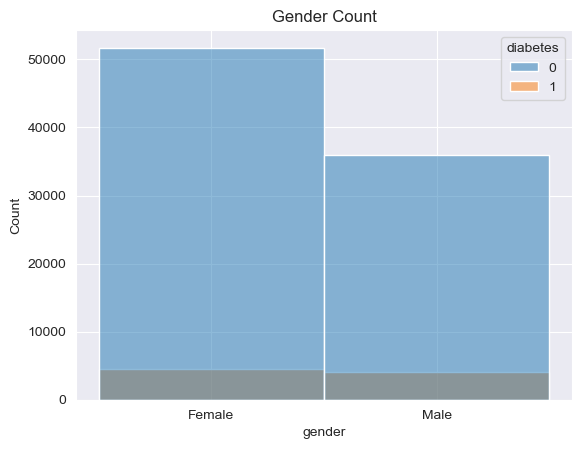

In [8]:
df = df[df['gender'] != 'Other']
print(df['gender'].value_counts())

plt.title('Gender Count')
sns.histplot(data=df, x='gender', hue='diabetes');

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [10]:
print(f'There are {df.isnull().sum().sum()} samples containing missing values')

There are 0 samples containing missing values


## Data Visualisation

### Univariate Analysis

Diabetic samples: 8482
Non-diabetic samples: 87646


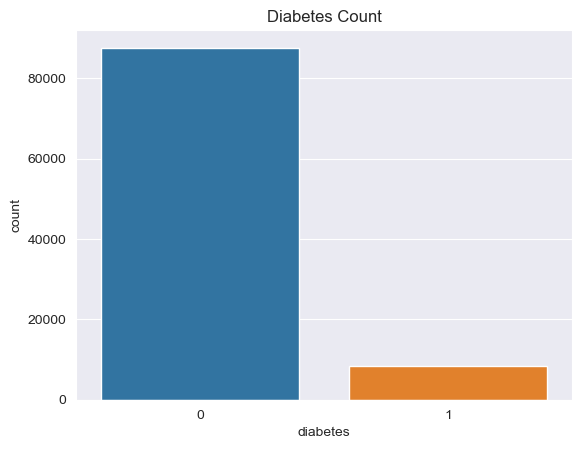

In [11]:
vc = df['diabetes'].value_counts()
print(f'Diabetic samples: {vc[1]}')
print(f'Non-diabetic samples: {vc[0]}')

plt.title('Diabetes Count')
sns.countplot(data=df, x='diabetes');

Hypertension samples: 7461
Non-hypertension samples: 88667


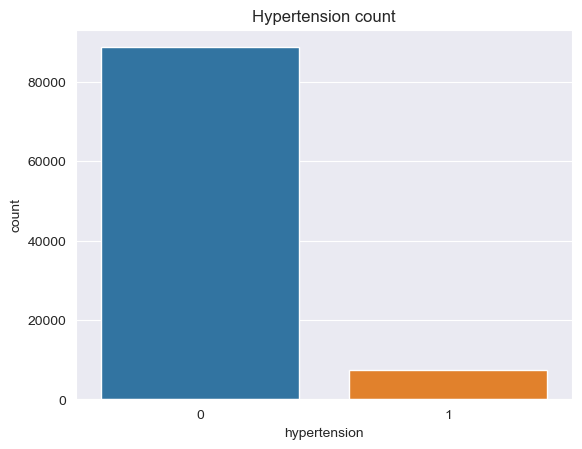

In [12]:
vc = df['hypertension'].value_counts()
print(f'Hypertension samples: {vc[1]}')
print(f'Non-hypertension samples: {vc[0]}')

plt.title('Hypertension count')
sns.countplot(data=df, x='hypertension');

Heart disease samples: 3923
Non-heart disease samples: 92205


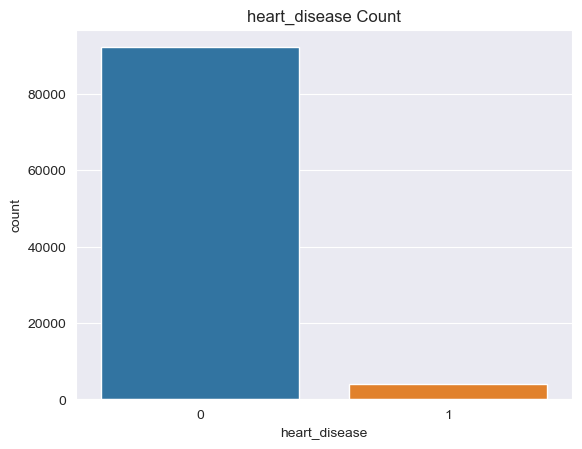

In [13]:
vc = df['heart_disease'].value_counts()
print(f'Heart disease samples: {vc[1]}')
print(f'Non-heart disease samples: {vc[0]}')

plt.title('heart_disease Count')
sns.countplot(data=df, x='heart_disease');

### BMI (Body Mass Index)

Description of the BMI column: 
count    96128.000000
mean        27.321450
std          6.767811
min         10.010000
25%         23.400000
50%         27.320000
75%         29.860000
max         95.690000
Name: bmi, dtype: float64


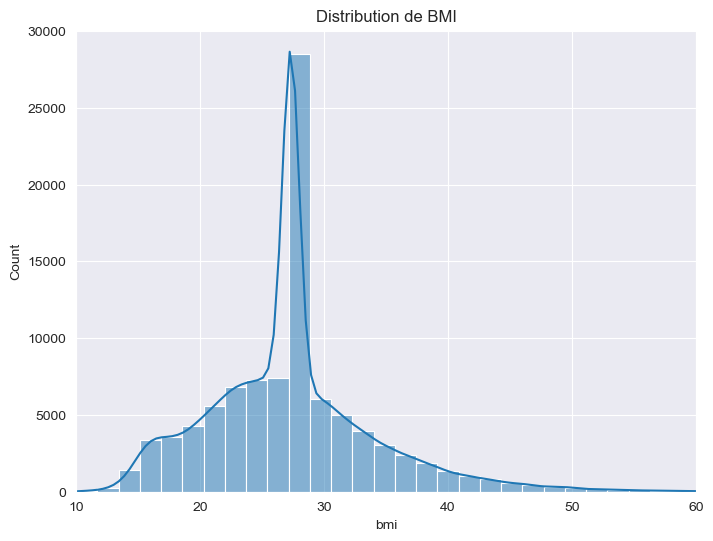

In [14]:
print(f"Description of the BMI column: \n{df['bmi'].describe()}")

plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True, bins=50)
plt.xlim(10, 60)
plt.title('Distribution de BMI');

The value 27.32 occurs at an unusual rate in the data.

In [16]:
# Percentage of the values
df.bmi.value_counts(normalize=True).head()*100

27.32    22.531416
23.00     0.107149
27.12     0.105068
24.96     0.104028
27.80     0.104028
Name: bmi, dtype: float64

This value is, most probably, the default value for the standard medical category "Overweight", which is people with a BMI in the range [25, 30)*. We can see below that the mean value of overweight people, excluding the value 27.32, is 27.39.

*Source: [cancer.org](https://www.cancer.org/cancer/risk-prevention/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html)

In [18]:
df[(df['bmi'] >= 25) &
   (df['bmi'] < 30) &
   (df['bmi'] != 27.32)]['bmi'].describe()['mean']

27.389291886820406

We have decided to leave this value as it is, because the BMI variable is a continuous one. This means that transforming it into a categorical variable with value ranges would make us lose important information about the patient without providing any benefit to prediction quality.

### Age

Age ranges are mostly balanced in our data, except for the age 80, which is over-represented.

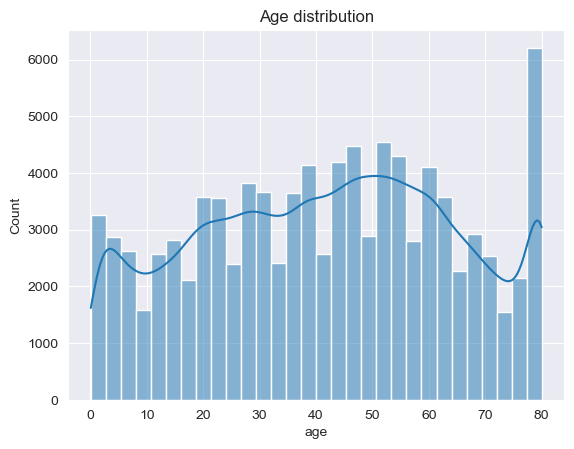

In [19]:
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age distribution')
plt.show()

In [20]:
df['age'].value_counts(normalize=True).head()*100

80.0    5.130659
51.0    1.629078
47.0    1.569782
48.0    1.568742
53.0    1.557299
Name: age, dtype: float64

Our data correctly reflects the prevalence of diabetes in older adults, giving adults over 80 years old an occurrence rate of around 20%. [This source](https://www.kff.org/other/state-indicator/adults-with-diabetes-by-age/?currentTimeframe=0&selectedDistributions=ages-75&selectedRows=%7B%22wrapups%22:%7B%22united-states%22:%7B%7D%7D%7D&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D) confirms that this statistic is correct.

In [24]:
print(f"Diabetics under 80 y/o: {round(df[df['age'] < 80]['diabetes'].mean()*100, 2)}%")
print(f"Diabetics at 80 y/o: {round(df[df['age'] >= 80]['diabetes'].mean()*100, 2)}%")

Diabetics under 80 y/o: 8.19%
Diabetics at 80 y/o: 20.56%


### Smoking history

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64


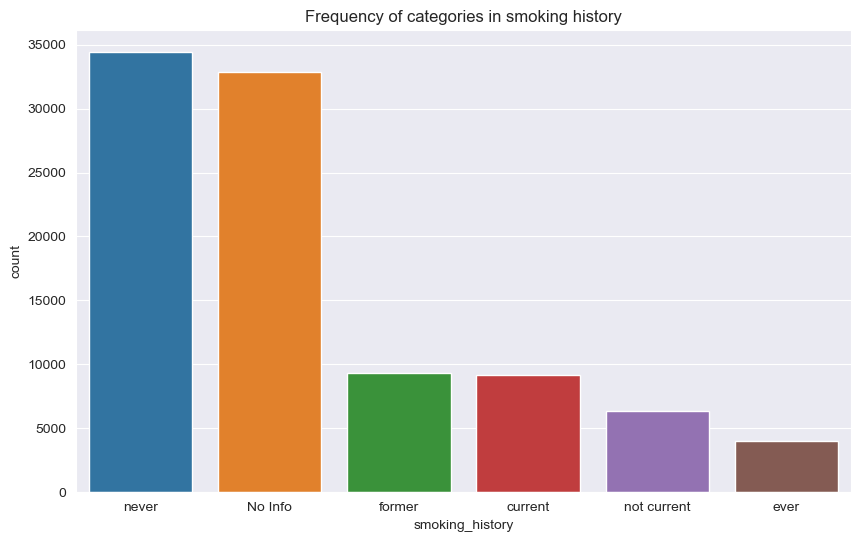

In [33]:
print(df['smoking_history'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', data=df, order = df['smoking_history'].value_counts().index)
plt.title('Frequency of categories in smoking history');

### Blood glucose level

Number of unique values: 18
Total number of values: 96128


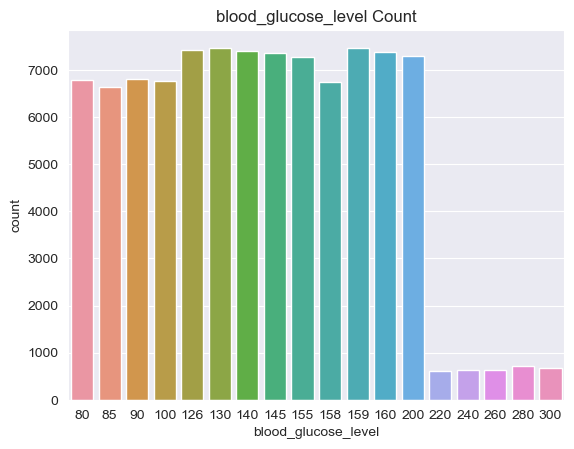

In [32]:
# print(df['blood_glucose_level'].value_counts())
print(f"Number of unique values: {df['blood_glucose_level'].nunique()}")
print(f"Total number of values: {df['blood_glucose_level'].count()}")

plt.title('blood_glucose_level Count')
sns.countplot(data=df, x='blood_glucose_level');

### Multi-variate Analysis

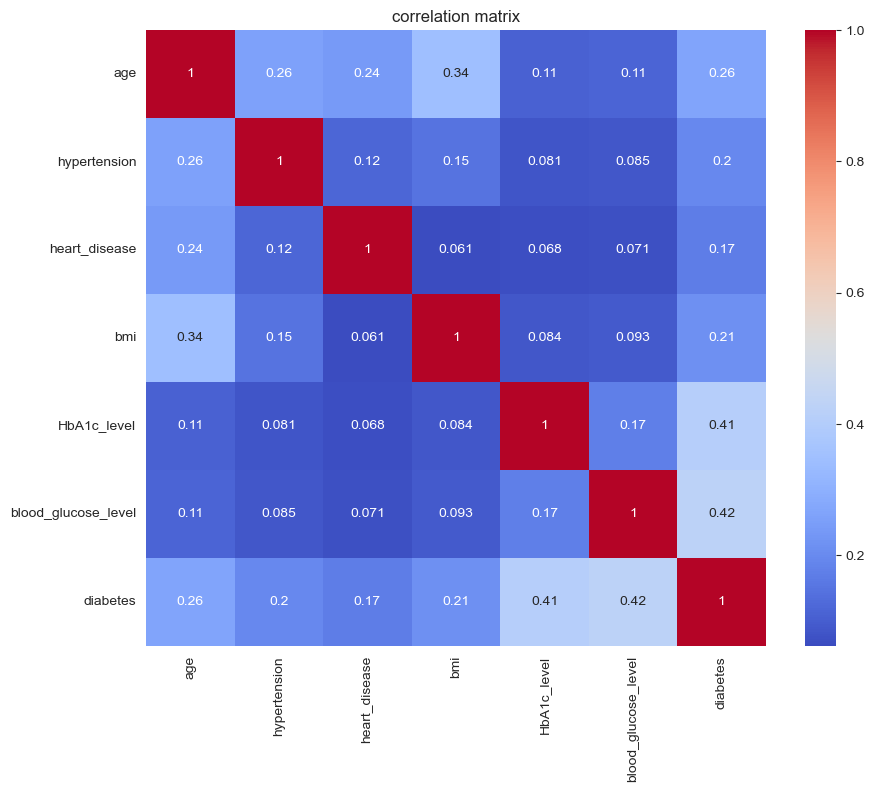

In [31]:
numeric_cols = df.select_dtypes(include=[np.number]).columns  # 
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix');

### Age and Diabetes

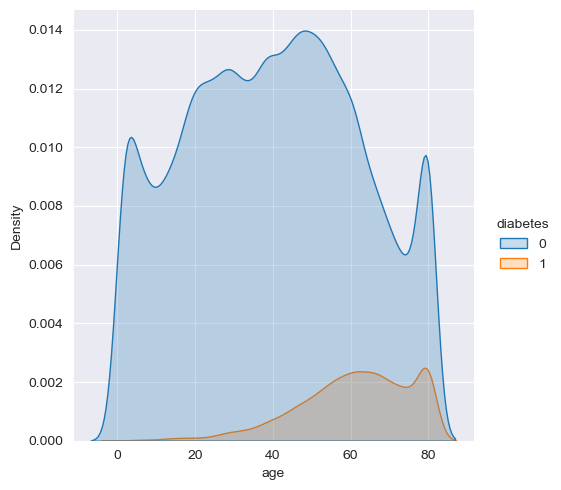

In [30]:
sns.displot(kind='kde', data=df, x='age', hue='diabetes', fill=True);

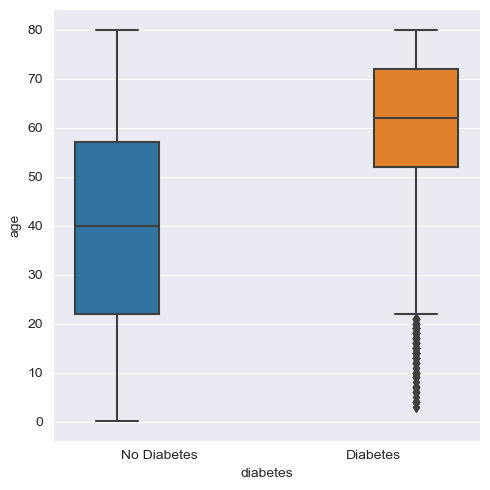

In [35]:
ax = sns.catplot(kind='box', data=df, x='diabetes', y='age',hue='diabetes')
ax.set_xticklabels(['No Diabetes', 'Diabetes']);

### Gender and Diabetes

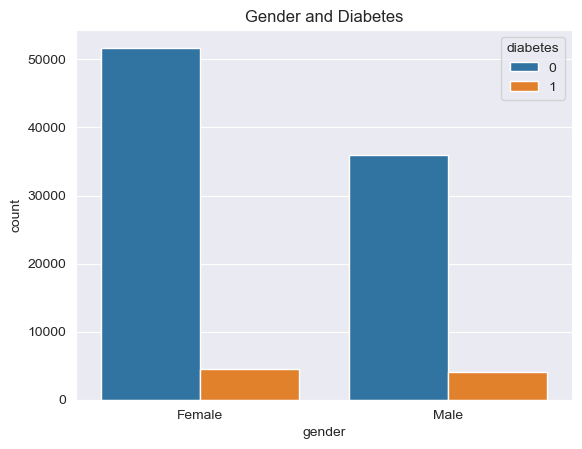

In [40]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender and Diabetes');

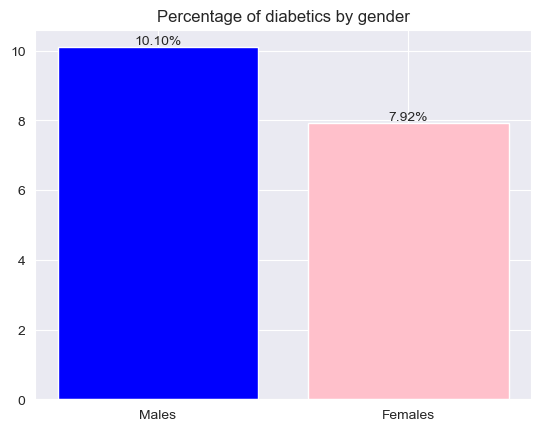

In [66]:
males = df[df['gender'] == 'Male']
females = df[df['gender'] == 'Female']

diabetic_percentages = males['diabetes'].mean() * 100, females['diabetes'].mean() * 100

colors = ['blue', 'pink']
plt.bar(['Males', 'Females'], diabetic_percentages, color=colors)

for i, val in enumerate(diabetic_percentages):
    plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom')

plt.title('Percentage of diabetics by gender');

i.e. in the male population, 10.1% are diabetics, 7.92% for females

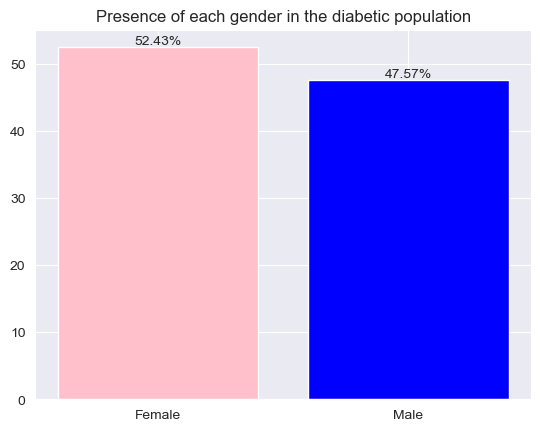

In [67]:
diabetic_individuals = df[df['diabetes'] == 1]

diabetic_counts = diabetic_individuals['gender'].value_counts()

diabetic_percentages = (diabetic_counts / len(diabetic_individuals)) * 100

colors = ['pink' if gender == 'Female' else 'blue' for gender in diabetic_percentages.index]
plt.bar(diabetic_percentages.index, diabetic_percentages, color=colors)

for i, val in enumerate(diabetic_percentages):
    plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom')

plt.title('Presence of each gender in the diabetic population');

i.e. in the diabetic population, 52.43% are females and 47.57% are males

Number of females: 56161
Number of males: 39967
There are 16.85% more females than males.


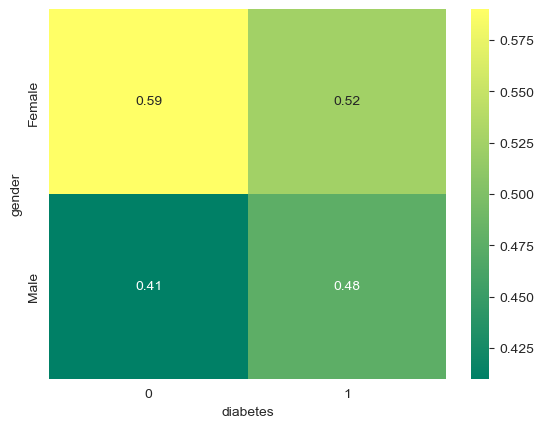

In [81]:
female_count = len(df[df['gender'] == 'Female'])
male_count = len(df[df['gender'] == 'Male'])
percentage_more_female = (female_count - male_count) / len(df) * 100

print(f"Number of females: {female_count}")
print(f"Number of males: {male_count}")
print(f"There are {percentage_more_female:.2f}% more females than males.")


temp_df = pd.crosstab(df['gender'], df['diabetes'], normalize='columns')
sns.heatmap(temp_df, annot=True, cmap='summer');

It would seem like women get diagnosed more frequently than men, given their slight over-representation in the data. However, men tend to be positive on diabetes more frequently. 

The later observation seems to be consistent with the fact that diabetes is the cause of death for slightly more males than females, acording to [kff.org](https://www.kff.org/other/state-indicator/diabetes-death-rate-by-gender/?dataView=1&currentTimeframe=0&selectedDistributions=male--female&selectedRows=%7B%22wrapups%22:%7B%22united-states%22:%7B%7D%7D%7D&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D), but we were not able to verify the former.

### HbA1c levels

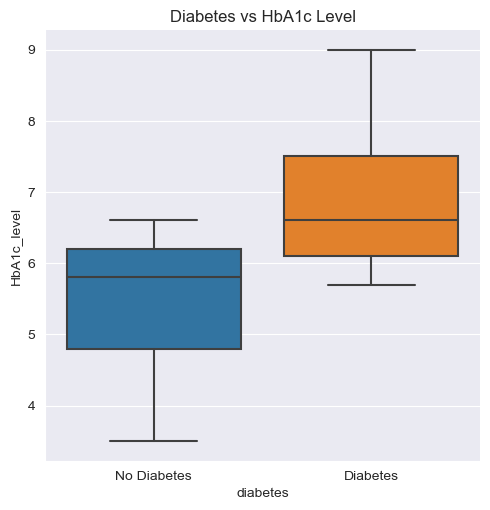

In [83]:
ax = sns.catplot(data=df, x='diabetes', y='HbA1c_level', kind='box')
ax.set(title='Diabetes vs HbA1c Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes']);

In [85]:
# Create a new Boolean variable
df['high_blood_glucose'] = df['blood_glucose_level'] > 220

# Calculate the correlation coefficient
correlation = df['diabetes'].corr(df['high_blood_glucose'])
print('Correlation: ', correlation)

Correlation:  0.5427025279865672


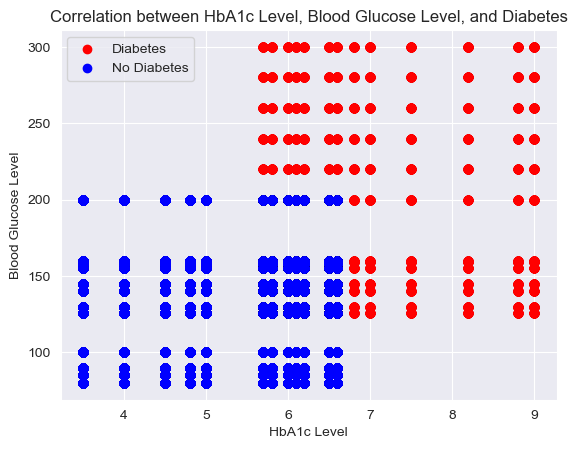

In [86]:
diabetes_positive = df[df['diabetes'] == 1]
diabetes_negative = df[df['diabetes'] == 0]

plt.scatter(diabetes_positive['HbA1c_level'], diabetes_positive['blood_glucose_level'], color='red', label='Diabetes')
plt.scatter(diabetes_negative['HbA1c_level'], diabetes_negative['blood_glucose_level'], color='blue', label='No Diabetes')

plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.title('Correlation between HbA1c Level, Blood Glucose Level, and Diabetes')
plt.legend();

In [87]:
# Filter the data based on the conditions
filtered_data = df[(df['HbA1c_level'] > 7) & (df['blood_glucose_level'] > 200)]

# Extract the values of HbA1c_level and blood_glucose_level
hbA1c_values = filtered_data['HbA1c_level']
blood_glucose_values = filtered_data['blood_glucose_level']
diabetes_presence = filtered_data['diabetes']

# Calculate the correlation
correlation = np.corrcoef(hbA1c_values, blood_glucose_values)[0, 1]

# Display the results
print("Correlation between HbA1c Level and Blood Glucose Level for individuals with HbA1c > 7 and blood glucose > 200:")
print(f"Correlation coefficient: {correlation:.2f}")
print(f"Presence of diabetes count: {diabetes_presence.sum()}")

Correlation between HbA1c Level and Blood Glucose Level for individuals with HbA1c > 7 and blood glucose > 200:
Correlation coefficient: 0.05
Presence of diabetes count: 971


Percentage of diabetics with blood glucose > 200: 38.48%
Percentage of diabetics with HbA1c > 7: 30.81%
Percentage of diabetes among individuals with HbA1c > 7 and blood glucose > 200:
Percentage of individuals with HbA1c > 7 and blood glucose > 200: 100.00%


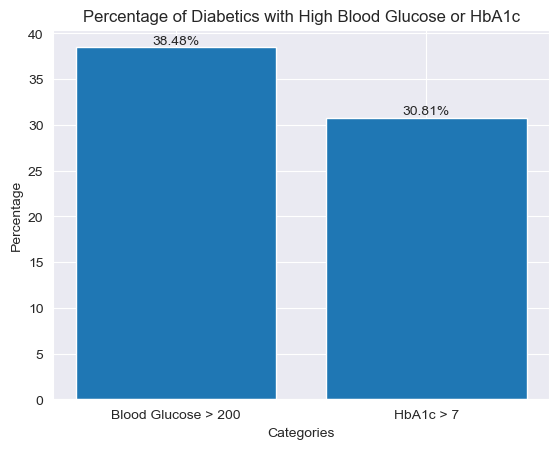

In [89]:
# Filter out diabetics with blood glucose > 200
diabetes_high_glucose = df[(df['diabetes'] == 1) & (df['blood_glucose_level'] > 200)]
percentage_diabetes_high_glucose = (len(diabetes_high_glucose) / len(df[df['diabetes'] == 1])) * 100
print(f"Percentage of diabetics with blood glucose > 200: {percentage_diabetes_high_glucose:.2f}%")

# Filter diabetic individuals with HbA1c > 7
diabetes_high_HbA1c = df[(df['diabetes'] == 1) & (df['HbA1c_level'] > 7)]
percentage_diabetes_high_HbA1c = (len(diabetes_high_HbA1c) / len(df[df['diabetes'] == 1])) * 100
print(f"Percentage of diabetics with HbA1c > 7: {percentage_diabetes_high_HbA1c:.2f}%")

# with and condition
diabetes_percentage = (diabetes_presence.mean()) * 100
print("Percentage of diabetes among individuals with HbA1c > 7 and blood glucose > 200:")
print(f"Percentage of individuals with HbA1c > 7 and blood glucose > 200: {diabetes_percentage:.2f}%")


# Calculate the percentages
percentage_diabetes_high_glucose = (len(diabetes_high_glucose) / len(df[df['diabetes'] == 1])) * 100
percentage_diabetes_high_HbA1c = (len(diabetes_high_HbA1c) / len(df[df['diabetes'] == 1])) * 100

# Create the bar plot
categories = ['Blood Glucose > 200', 'HbA1c > 7']
percentages = [percentage_diabetes_high_glucose, percentage_diabetes_high_HbA1c]

plt.bar(categories, percentages)

# Add bar labels
for i, val in enumerate(percentages):
    plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetics with High Blood Glucose or HbA1c');

### Smoking history

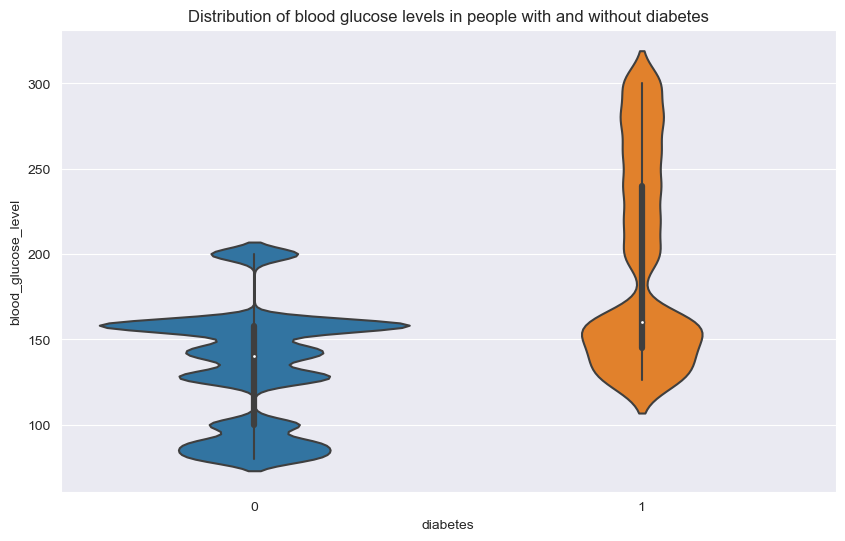

In [90]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Distribution of blood glucose levels in people with and without diabetes');

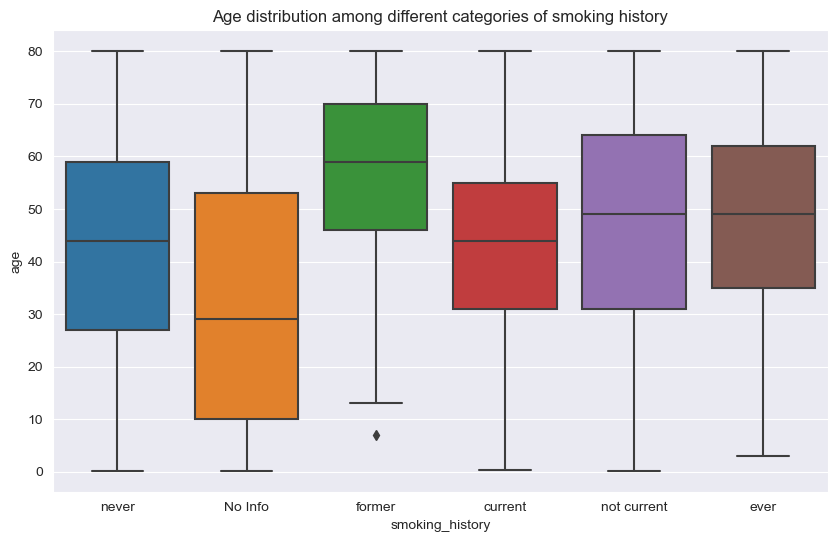

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='age', data=df, order = df['smoking_history'].value_counts().index)
plt.title('Age distribution among different categories of smoking history');

### BMI and Diabetes

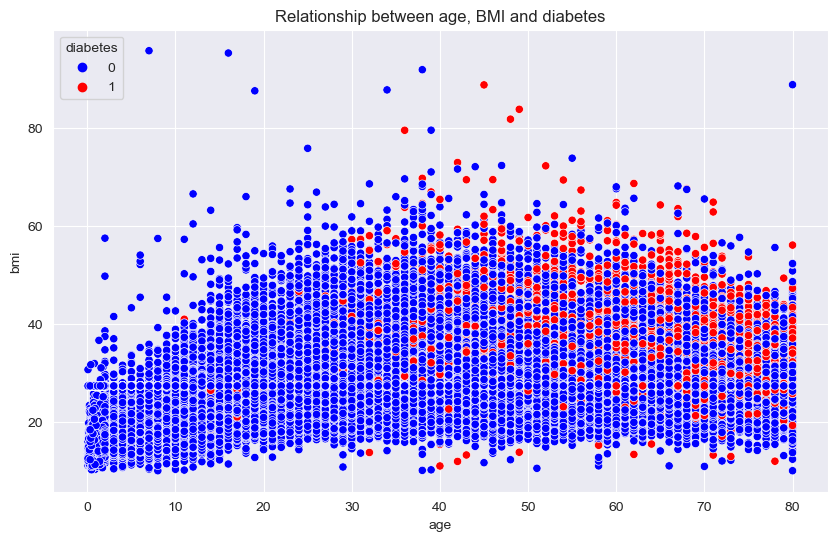

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', hue='diabetes', palette={0: 'blue', 1: 'red'}, data=df)
plt.title('Relationship between age, BMI and diabetes');

# Machine Learning

## Encoding

In [93]:
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96128 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
 9   high_blood_glucose   96128 non-null  bool   
dtypes: bool(1), float64(3), int64(4), object(2)
memory usage: 9.4+ MB


In [94]:
# Show NaN values
print(f"Number of NaN values in the dataset: {df_copy.isna().sum().sum()}")

Number of NaN values in the dataset: 0


In [95]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_copy['gender'] = le.fit_transform(df_copy['gender'])

df_copy = pd.get_dummies(df_copy, columns=['smoking_history'], drop_first=True)

df_copy['high_blood_glucose'] = df_copy['high_blood_glucose'].astype(int)

In [96]:
# Show NaN values
print(f"Number of NaN values in the dataset: {df_copy.isna().sum().sum()}")

Number of NaN values in the dataset: 0


In [97]:
X = df_copy.drop('diabetes', axis=1)
y = df_copy['diabetes']

In [100]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [103]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipe = Pipeline([('classifier', RandomForestClassifier())])


# Create dictionary with candidate learning algorithms and their hyperparameters
search_space = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [50, 100, 150],
                 "classifier__max_depth":[5,8,15,25,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15],
                 "classifier__max_leaf_nodes": [2, 5,10]},
                {"classifier": [SVC()],
                 "classifier__kernel": ['linear', 'rbf'],
                 "classifier__C": [1, 10, 100]},
                {"classifier": [GradientBoostingClassifier()],
                 "classifier__n_estimators": [50, 100, 150],
                 "classifier__learning_rate": [0.001, 0.01, 0.1],
                 "classifier__subsample": [0.5, 0.7, 1.0],
                 "classifier__max_depth": [3, 7, 9]},
                {"classifier": [KNeighborsClassifier()],
                 "classifier__n_neighbors": [3, 5, 11],
                 "classifier__weights": ["uniform", "distance"],
                 "classifier__metric": ["euclidean", "manhattan"]},
                {"classifier": [AdaBoostClassifier()],
                 "classifier__n_estimators": [50, 100, 150],
                 "classifier__learning_rate": [0.001, 0.01, 0.1]}
                ]

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='macro'),
           'recall': make_scorer(recall_score, average='macro'),
           'f1': make_scorer(f1_score, average='macro')}

# Loop over the different scores
for score_name, score_func in scoring.items():
    gridsearch = GridSearchCV(pipe, search_space, cv=5, scoring=score_func, n_jobs=-1)

    best_model = gridsearch.fit(X_train, y_train)

    print(f"Best model for {score_name}: {best_model.best_estimator_}")
    print(f"Best parameters for {score_name}: {best_model.best_params_}")
    print(f"Best score for {score_name}: {best_model.best_score_}\n")

In [104]:
params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}

best_model_acc = GradientBoostingClassifier(**params)

best_model_acc.fit(X_train, y_train)

y_pred_acc = best_model_acc.predict(X_test)

In [105]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_acc)
precision = precision_score(y_test, y_pred_acc)
recall = recall_score(y_test, y_pred_acc)
f1 = f1_score(y_test, y_pred_acc)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9694164152709872
Precision: 0.9834926151172894
Recall: 0.6654908877131099
F1 Score: 0.79382889200561


In [106]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(), X, y, param_name="learning_rate", param_range=param_range,
    scoring="accuracy", n_jobs=1)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cm  = confusion_matrix(y_test, y_pred)
    
# Visualize it
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Get the confusion matrix
cm  = confusion_matrix(y_test, y_pred, normalize='true')
    
# Visualize it
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".3f", cmap='Blues') 
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

y_score = best_model.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SMOTE to oversample the dataset for better training performance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Compute the scale_pos_weight value
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Define the model with scale_pos_weight
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight)

# Fit the model
xgb.fit(X_train_res, y_train_res)

# Predict
y_pred = xgb.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

# Print the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report: \n", cr)

Confusion Matrix: 
 [[15497  2028]
 [  159  1542]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     17525
           1       0.43      0.91      0.59      1701

    accuracy                           0.89     19226
   macro avg       0.71      0.90      0.76     19226
weighted avg       0.94      0.89      0.90     19226


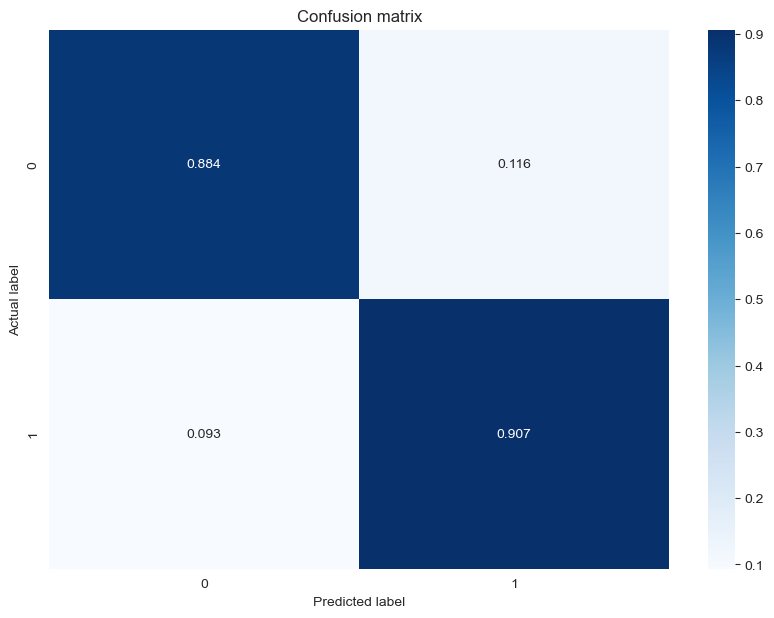

In [18]:
# Get the confusion matrix
cm  = confusion_matrix(y_test, y_pred, normalize='true')
    
# Visualize it
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".3f", cmap='Blues') 
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

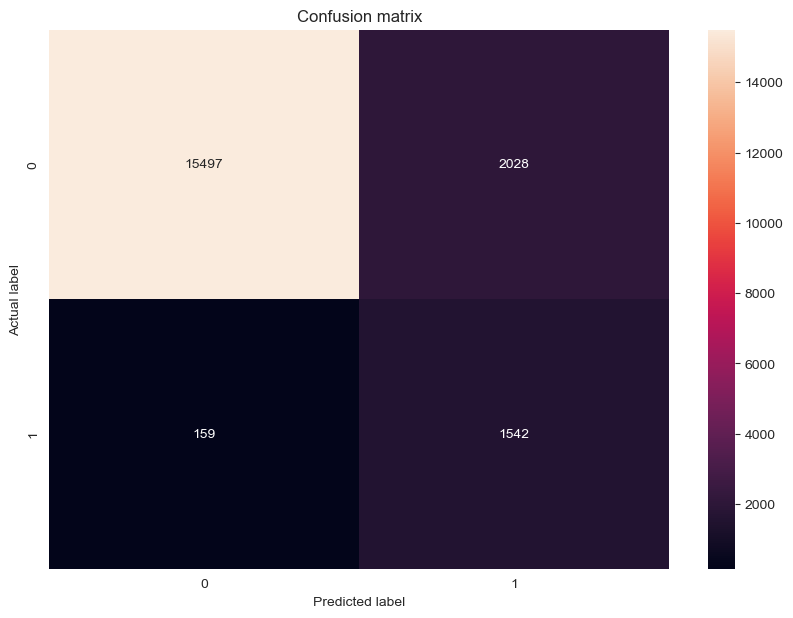

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cm  = confusion_matrix(y_test, y_pred)
    
# Visualize it
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

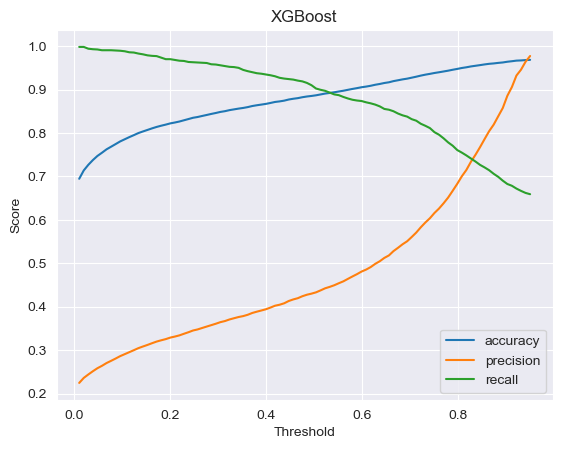

In [20]:
from collections import defaultdict
scores = defaultdict(list)
test_vals = np.linspace(0.01, .95, 100)
for threshold in test_vals:
    y_pred = xgb.predict_proba(X_test)
    y_pred = y_pred[:, 1] > threshold

    scores['accuracy'].append(accuracy_score(y_test, y_pred))
    scores['precision'].append(precision_score(y_test, y_pred, zero_division=0))
    scores['recall'].append(recall_score(y_test, y_pred))

for measure in scores.keys():
    sns.lineplot(y=scores[measure], x=test_vals, label=measure)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('XGBoost')
plt.legend();

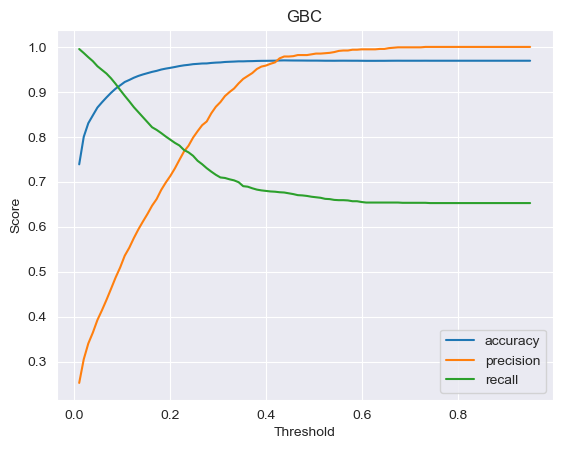

In [21]:
scores = defaultdict(list)
test_vals = np.linspace(0.01, .95, 100)
for threshold in test_vals:
    y_pred = best_model_acc.predict_proba(X_test)
    y_pred = y_pred[:, 1] > threshold

    scores['accuracy'].append(accuracy_score(y_test, y_pred))
    scores['precision'].append(precision_score(y_test, y_pred, zero_division=0))
    scores['recall'].append(recall_score(y_test, y_pred))

for measure in scores.keys():
    sns.lineplot(y=scores[measure], x=test_vals, label=measure)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('GBC')
plt.legend();

The choice of the model and the threshold for diagnosis are the most important aspects of our final decision as a group. These will determine the quality and validity of our predictions.

XGBoost seems to manage to maintain a high recall for high threshold levels, but that comes at the cost of a very low precision relative to GradientBoosting. This means that while we would be able to correctly diagnose most of the diabetic cases, we would incorrectly classify more than half of our patients (for a threshold of around 55%, where recall is at 90%).

In contrast, our GBC model loses on its recall score very quickly, allowing for a 90% detection rate of diabetes for a threshold of around 8%. For the same level of recall as XGBoost though, this model attains around 53% precision.

If we allow ourselves to correctly classify 80% of diabetic cases instead of 90%, XGBoost manages a precision score of around 62%, while GBC attains 70% precision for the same recall score.

GBC seems to be a better choice given these findings.